Concatenate and pandaize data downloaded from CityProtect.
Given a folder, find all the files ending with "Los_Altos_Police_Department_report.csv", concatenate, and sort by date.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import sys
sys.path.append("../code")

In [2]:
import glob
import loaders.cityprotect as cp

In [3]:
dept = "Los Altos Police Department"
df = cp.cityprotect("../data/raw_data/{}".format(dept.replace(" ", "_")))

Loading from 26 files.


In [4]:
incident_types = set([a.strip() for b in df['incidentType'].str.split(';').values for a in b])

In [5]:
len(incident_types)

163

In [6]:
freqs = df['parentIncidentType'].value_counts()

In [7]:
freqs

parentIncidentType
Other                  41222
Proactive Policing     22147
Quality of Life         9299
Traffic                 6190
Theft                   1746
Fire                    1570
Property Crime           706
Breaking & Entering      529
Theft of Vehicle         293
Assault                  147
Robbery                   26
Sexual Offense             5
Name: count, dtype: int64

In [8]:
parentIncident_types = set([a.strip() for b in df['parentIncidentType'].str.split(';').values for a in b])

In [9]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Robbery',
 'Sexual Offense',
 'Theft',
 'Theft of Vehicle',
 'Traffic'}

In [10]:
monthly = {k: df[df["parentIncidentType"] == k].groupby(pd.Grouper(key="date", freq="M"))
           for k in parentIncident_types}

In [11]:
monthly_df = pd.DataFrame({k: monthly[k].count()["ccn"] for k in parentIncident_types}).fillna(0)

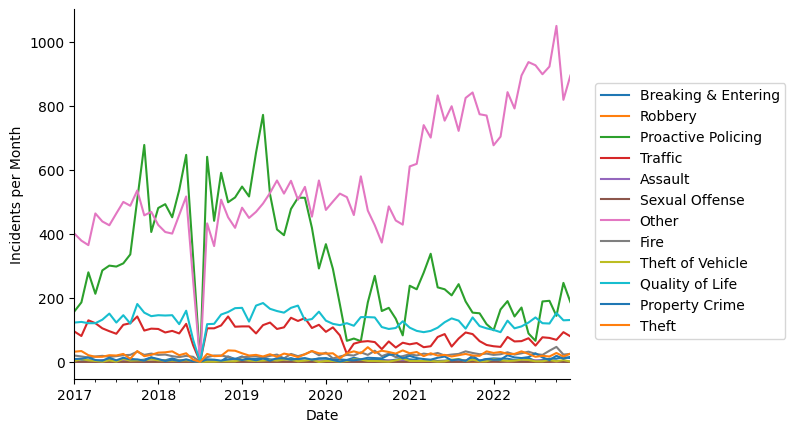

In [12]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#plt.savefig("Stops_over_time.png", bbox_inches="tight")

In [13]:
set(df[df["parentIncidentType"]=="Other"]["incidentType"])

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ALARM',
 'ALARM;RMS: ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ANIMAL;XPTL - EXTRA PATROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ATTEMPT TO CONTACT',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMUNITY RELATIONS',
 'CPS',
 'CPS;RMS: ALARM',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE; MENTAL HEALTH ISSUE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLOSION',
 'FINANCIAL CRIME',
 'FINANCIAL CRIME;RMS: DMVL',
 'FIRE',
 'FIRE DEPT ASSIST',
 'FIRE INFORMATION',
 'FIREARM DISCHARGE (HEARD ONLY)',
 'FLAGGED DOWN BY CITIZEN IN FIELD',
 'FOLLOW UP',
 'FOUND',
 'FOUND;FICTITIOUS/STOLEN/ALTERED/SUSPENDED PLATE',
 'GAS',
 'GENERA

In [27]:
set(df[df["parentIncidentType"]=="Property Crime"]["incidentType"])

{'GRAND THEFT', 'STOLEN VEHICLE; GRAND THEFT', 'VANDALISM'}

In [15]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft"]

In [16]:
violent_list = ["Assault", "Robbery"]

In [17]:
df[df["incidentType"]=="COMMERCIAL BURGLARY"].groupby(pd.Grouper(key="date", freq="M"))["ccn"].count()

date
2017-01-31     4
2017-02-28     0
2017-03-31     2
2017-04-30     3
2017-05-31     2
              ..
2022-08-31     4
2022-09-30     4
2022-10-31     3
2022-11-30    11
2022-12-31     3
Freq: M, Name: ccn, Length: 72, dtype: int64

In [18]:
crime_frame_dict = {"Property Crime": monthly_df[prop_list].sum(axis=1),
                    "Commercial Burglary": df[df["incidentType"]=="COMMERCIAL BURGLARY"].groupby(pd.Grouper(key="date", freq="M")
                                                                )["ccn"].count()}

In [19]:
crime_df = pd.DataFrame(crime_frame_dict)

In [20]:
crime_df

,Property Crime,Commercial Burglary
date,,
2017-01-31,53,4
2017-02-28,60,0
2017-03-31,45,2
2017-04-30,29,3
2017-05-31,24,2
...,...,...
2022-08-31,41,4
2022-09-30,39,4
2022-10-31,59,3


In [21]:
crime_df.index.min()

Timestamp('2017-01-31 00:00:00')

In [22]:
xdates = [crime_df.index.min(), crime_df.index.max()]
y_avg = [crime_df["Property Crime"].mean(), crime_df["Property Crime"].mean()]

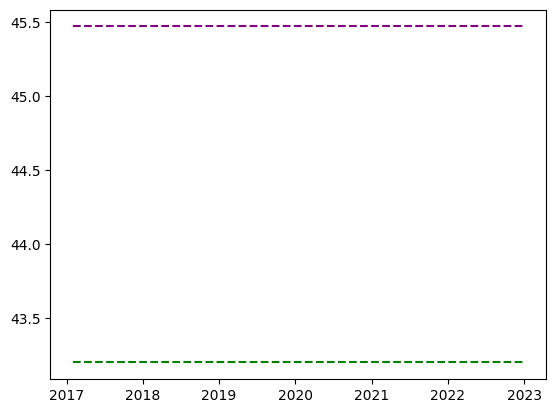

In [23]:
plt.plot(xdates, y_avg, linestyle="dashed", color="purple")
plt.plot(xdates, [0.95*y for y in y_avg], linestyle="dashed", color="green")

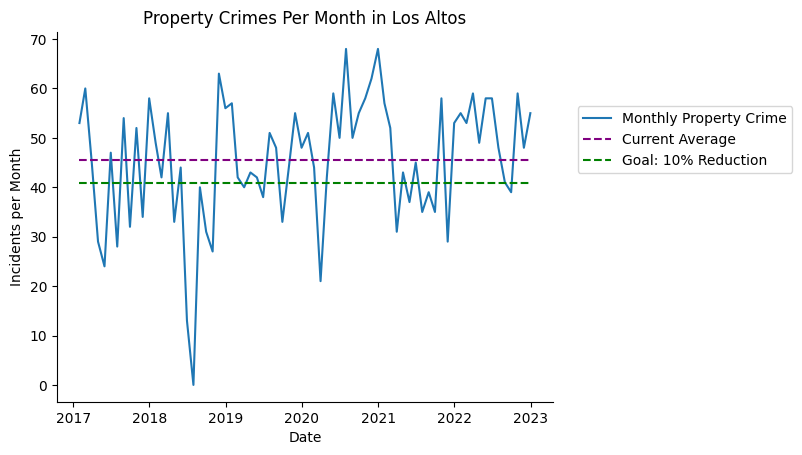

In [24]:
#ax = crime_df.plot()
f = plt.figure()
ax = plt.gca()
ax.plot(crime_df["Property Crime"], label="Monthly Property Crime")
ax.plot(xdates, y_avg, linestyle="dashed", color="purple", label="Current Average")
ax.plot(xdates, [0.90*y for y in y_avg], linestyle="dashed", color="green", label="Goal: 10% Reduction")
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title="Property Crimes Per Month in Los Altos")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
plt.savefig("Property_Crimes_per_Month.png", bbox_inches="tight")

In [25]:
avg_monthly_df = monthly_df[prop_list].rolling(window=3).mean()

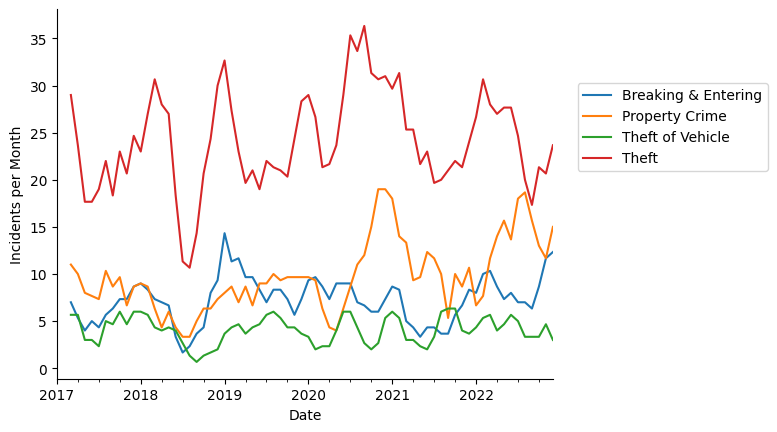

In [26]:
ax = avg_monthly_df[prop_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#.savefig("Stops_over_time.png", bbox_inches="tight")

In [27]:
avg_monthly_df=monthly_df[violent_list].rolling(window=3).mean()

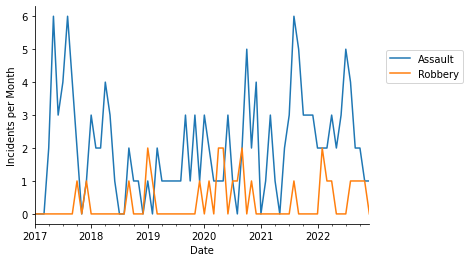

In [28]:
ax = monthly_df[violent_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#.savefig("Stops_over_time.png", bbox_inches="tight")

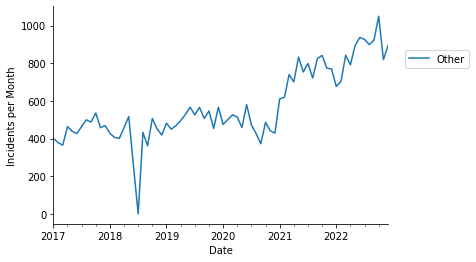

In [29]:
ax = monthly_df["Other"].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [30]:
other_df = df[df["parentIncidentType"]=="Other"]

In [31]:
other_incident_types = set([a.strip() for b in other_df['incidentType'].str.split(';').values for a in b])

In [32]:
other_incident_types

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ATTEMPT TO CONTACT',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CFS TRANSPORT',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMUNITY RELATIONS',
 'CPS',
 'CRIMINAL DAMAGE-DEFACE-FELONY',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLOSION',
 'FICTITIOUS/STOLEN/ALTERED/SUSPENDED PLATE',
 'FINANCIAL CRIME',
 'FIRE',
 'FIRE DEPT ASSIST',
 'FIRE INFORMATION',
 'FIREARM DISCHARGE (HEARD ONLY)',
 'FLAGGED DOWN BY CITIZEN IN FIELD',
 'FOLLOW UP',
 'FOUND',
 'GAS',
 'GENERAL EXPLOSION',
 'GENERAL WATER CALL',
 'GUN DISPOSAL',
 'H&S REGISTRANT',
 'H

In [33]:
other_monthly = {k: other_df[other_df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in other_incident_types}

In [34]:
other_monthly_df = pd.DataFrame({k: other_monthly[k].count()["ccn"] for k in other_incident_types}).fillna(0)

In [35]:
top_other = other_monthly_df.sum().sort_values(ascending=False).index.values[0:6]

In [36]:
top_other

array(['PATROL AREA CHECK', 'ALARM', '911', 'MUNI CODE VIOLATION',
       'MEDICAL EMERGENCY', 'INFO GENERAL'], dtype=object)

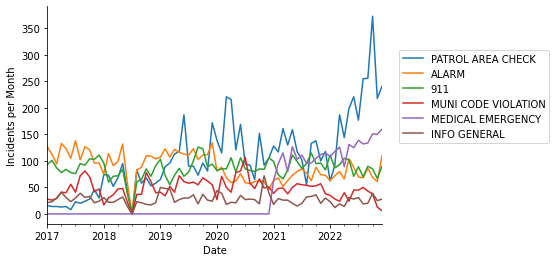

In [37]:
ax = other_monthly_df[top_other].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [38]:
df[df["incidentType"]=="RAPE"]

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
78508,L211028046,2021-10-29 04:13:42,2021-10-29 18:01:16,LOS ALTOS,CA,94024,900 Block BERRY AVE,RAPE,Sexual Offense,Type: RAPE<br />Disposition: R REPORT TAKEN
77833,L211115012,2021-11-15 20:02:12,2021-11-16 10:11:12,LOS ALTOS,CA,94022,200 Block ALMOND AVE,RAPE,Sexual Offense,Type: RAPE<br />Disposition: R REPORT TAKEN
41278,L220104007,2022-01-04 17:27:28,2022-01-05 02:39:20,LOS ALTOS,CA,94022,600 Block TORWOOD LN,RAPE,Sexual Offense,Type: RAPE<br />Disposition: R REPORT TAKEN
39213,L220301028,2022-03-01 18:50:42,2022-03-02 14:21:46,LOS ALTOS,CA,94022,200 Block ALMOND AVE,RAPE,Sexual Offense,Type: RAPE<br />Disposition: N NO REPORT TAKEN
83237,L221015032,2022-10-16 03:38:12,2022-10-16 16:19:44,LOS ALTOS,CA,94022,NO ADDRESS DATA,RAPE,Sexual Offense,Type: RAPE<br />Disposition: R REPORT TAKEN


In [39]:
propolicing_incident_types = set([a.strip() for b in df[df['parentIncidentType']=="Proactive Policing"]["incidentType"].str.split(';').values for a in b])

In [40]:
propolicing_incident_types

{'DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'FOOT PATROL',
 'PED/BIKE STOP',
 'PED/BIKE STOP: SEND FILL',
 'RMS: TRAFFIC OFFENSE',
 'TRAFFIC STOP',
 'TRAFFIC STOP: SEND FILL'}

In [41]:
monthly_all = df.groupby(pd.Grouper(key="date", freq="M"))

In [42]:
monthly_all_df = pd.DataFrame(monthly_all.count()["ccn"] ).fillna(0)

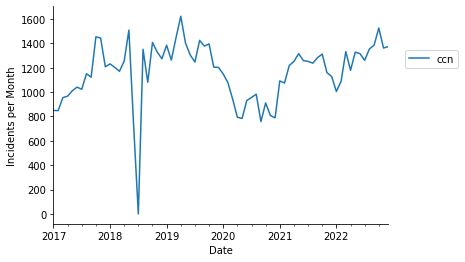

In [43]:
ax = monthly_all_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [44]:
incident_types

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ACCIDENT MEDICS EN ROUTE',
 'ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ASSAULT WITH A DEADLY WEAPON',
 'ASSAULT-INTENTIONAL/RECKLESSLY INJURE',
 'ATTEMPT TO CONTACT',
 'AUTO BURGLARY',
 'BATTERY',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BURGLARY 3RD DEGREE -- COMMERCIAL BUILDING',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CFS TRANSPORT',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMERCIAL BURGLARY',
 'COMMUNITY RELATIONS',
 'CPS',
 'CRIMINAL DAMAGE-DEFACE-FELONY',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISABLED VEH/TRAFF HAZARD',
 'DISORDERLY CONDUCT',
 'DISTURBANCE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'DRUNK DRIVER',
 'DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLO

In [45]:
import re

In [46]:
reg=re.compile('ACCID')

In [47]:
accid_types = list(filter(reg.search, incident_types))

In [48]:
accid_types

['NON INJURY ACCIDENT',
 'MAJOR INJURY ACCIDENT',
 'UNK INJURY ACCIDENT',
 'MINOR INJURY ACCIDENT',
 'RMS ACCIDENT INVOLVING DAMAGE TO VEHICLE > $200',
 'ACCIDENT MEDICS EN ROUTE',
 'ACCIDENT - NON VEHICULAR']

In [49]:
accid_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in accid_types}

In [50]:
accid_monthly_df = pd.DataFrame({k: accid_monthly[k].count()["ccn"] for k in accid_types}).fillna(0)

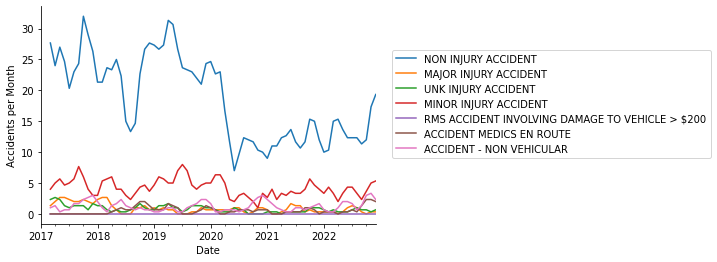

In [51]:
ax = accid_monthly_df.rolling(window=3).mean().plot()
ax.set(xlabel="Date", ylabel="Accidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [52]:
pac_df = df[df["incidentType"]=="PATROL AREA CHECK"]

In [53]:
nar = pac_df.iloc[[31]]["date"]

In [54]:
pac_df["narrative"].str.replace(' +', ' ')

/tmp/ipykernel_2831/1130871980.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pac_df["narrative"].str.replace(' +', ' ')


23661    Type: PATROL AREA CHECK<br />Disposition: ADV ...
23660    Type: PATROL AREA CHECK<br />Disposition: N NO...
23598    Type: PATROL AREA CHECK<br />Disposition: ADV ...
23557    Type: PATROL AREA CHECK<br />Disposition: ADV ...
23569    Type: PATROL AREA CHECK<br />Disposition: ADV ...
                               ...                        
79774    Type: PATROL AREA CHECK<br />Disposition: N NO...
79772    Type: PATROL AREA CHECK<br />Disposition: N NO...
79746    Type: PATROL AREA CHECK<br />Disposition: N NO...
79742    Type: PATROL AREA CHECK<br />Disposition: N NO...
79710    Type: PATROL AREA CHECK<br />Disposition: N NO...
Name: narrative, Length: 7711, dtype: object

In [55]:
nar_list = [x for x in pac_df["narrative"].str.replace(' +', ' ')]

/tmp/ipykernel_2831/164164286.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  nar_list = [x for x in pac_df["narrative"].str.replace(' +', ' ')]


In [56]:
nar_list

['Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: G GOA/UTL',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition

In [57]:
set(nar_list)

{'Type: PATROL AREA CHECK<br />Disposition: A ARREST ON VIEW',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: C CRIMINAL CITATION',
 'Type: PATROL AREA CHECK<br />Disposition: CAN CANCELLED CALL(DISPATCH)',
 'Type: PATROL AREA CHECK<br />Disposition: D TRAFFIC CITATION',
 'Type: PATROL AREA CHECK<br />Disposition: DUP DUPLICATE CALL',
 'Type: PATROL AREA CHECK<br />Disposition: F FI CARD',
 'Type: PATROL AREA CHECK<br />Disposition: G GOA/UTL',
 'Type: PATROL AREA CHECK<br />Disposition: H ASST. RENDERED/AGENCY ASST.',
 'Type: PATROL AREA CHECK<br />Disposition: L FILL UNIT',
 'Type: PATROL AREA CHECK<br />Disposition: M MALFUNCTION (ALARMS)',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: O OK (ALARMS)',
 'Type: PATROL AREA CHECK<br />Disposition: R REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: S SUPPLEMENTAL REPORT TAKEN',
 'Type: PATROL

In [58]:
pac_df["narrative"].str.replace(' +', ' ').str.upper().value_counts()

/tmp/ipykernel_2831/3137617586.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pac_df["narrative"].str.replace(' +', ' ').str.upper().value_counts()


TYPE: PATROL AREA CHECK<BR />DISPOSITION: N NO REPORT TAKEN                  6967
TYPE: PATROL AREA CHECK<BR />DISPOSITION: H ASST. RENDERED/AGENCY ASST.       397
TYPE: PATROL AREA CHECK<BR />DISPOSITION: ADV ADVISED EVENT/INFO ONLY BOL     205
TYPE: PATROL AREA CHECK<BR />DISPOSITION: W WARNING                            49
TYPE: PATROL AREA CHECK<BR />DISPOSITION: CAN CANCELLED CALL(DISPATCH)         36
TYPE: PATROL AREA CHECK<BR />DISPOSITION: G GOA/UTL                            14
TYPE: PATROL AREA CHECK<BR />DISPOSITION: F FI CARD                            14
TYPE: PATROL AREA CHECK<BR />DISPOSITION: U UNFOUNDED                           6
TYPE: PATROL AREA CHECK<BR />DISPOSITION: R REPORT TAKEN                        5
TYPE: PATROL AREA CHECK<BR />DISPOSITION: C CRIMINAL CITATION                   4
TYPE: PATROL AREA CHECK<BR />DISPOSITION: M MALFUNCTION (ALARMS)                4
TYPE: PATROL AREA CHECK<BR />DISPOSITION: O OK (ALARMS)                         3
TYPE: PATROL ARE

In [59]:
pac_df["narrative"]=pac_df["narrative"].str.strip()

/tmp/ipykernel_2831/3944300574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pac_df["narrative"]=pac_df["narrative"].str.strip()


In [60]:
reg = re.compile("COMM")

In [61]:
comm_list = list(filter(reg.search, incident_types))

In [62]:
comm_list

['COMMUNITY RELATIONS',
 'COMMERCIAL BURGLARY',
 'BURGLARY 3RD DEGREE -- COMMERCIAL BUILDING']

In [63]:
comm_df = df[df["incidentType"].isin(comm_list)]

In [64]:
comm_df

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
23188,L170117007,2017-01-17 13:28:30,2017-08-25 00:21:19,LOS ALTOS,CA,94022,300 Block MAIN ST,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
23025,L170123021,2017-01-23 18:34:32,2017-08-25 00:21:20,LOS ALTOS,CA,94022,4500 Block EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
22885,L170128007,2017-01-28 16:39:06,2017-08-25 00:21:21,LOS ALTOS,CA,94022,600 Block S EL MONTE AVE,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
22887,L170128009,2017-01-28 17:40:17,2017-08-25 00:21:21,LOS ALTOS,CA,94022,100 Block MAIN ST,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
21718,L170309028,2017-03-10 00:12:49,2017-08-25 00:20:47,LOS ALTOS,CA,94022,4900 Block EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
...,...,...,...,...,...,...,...,...,...,...
81293,L221127013,2022-11-27 14:44:24,2022-11-28 03:03:59,LOS ALTOS,CA,94022,300 Block SECOND ST,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
81161,L221129029,2022-11-29 18:02:12,2022-11-30 03:43:36,LOS ALTOS,CA,94022,200 Block ALMOND AVE,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
80845,L221205037,2022-12-06 05:39:50,2022-12-06 19:43:59,LOS ALTOS,CA,94022,4500 Block EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
80741,L221208024,2022-12-08 17:39:02,2022-12-09 10:02:11,LOS ALTOS,CA,94022,200 Block STATE ST,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: N ...


In [65]:
comm_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in comm_list}

In [66]:
comm_monthly_df = pd.DataFrame({k: comm_monthly[k].count()["ccn"] for k in comm_list}).fillna(0)

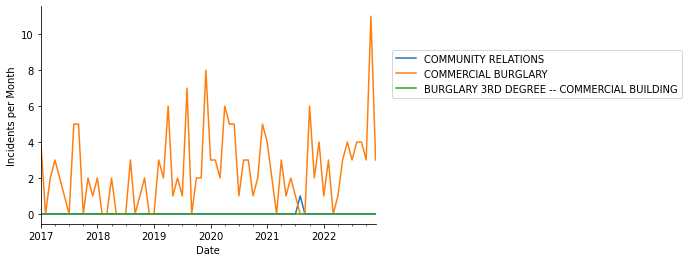

In [67]:
ax = comm_monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [68]:
df[df["blocksizedAddress"].str.contains("SELIG") == True].sort_values("date")

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
22240,L170218035,2017-02-19 05:30:14,2017-08-25 00:21:00,LOS ALTOS,CA,94024,1700 Block SELIG LN,GRAND THEFT,Property Crime,Type: GRAND THEFT<br />Disposition: R REPORT T...
2258,L170424026,2017-04-25 01:09:08,2017-08-25 00:21:24,LOS ALTOS,CA,94024,1700 Block SELIG LN,INFO GENERAL,Other,Type: INFO GENERAL<br />Disposition: ADV ADVIS...
767,L170608046,2017-06-09 01:36:26,2017-08-25 00:21:54,LOS ALTOS,CA,94024,HARWALT DR AND SELIG LN,VEHICLE CODE VIOL,Traffic,Type: VEHICLE CODE VIOL<br />Disposition: G GO...
63300,L171123002,2017-11-23 09:29:25,2017-12-06 20:26:02,LOS ALTOS,CA,94024,1700 Block SELIG LN,DISTURBANCE,Quality of Life,Type: DISTURBANCE<br />Disposition: N NO REPOR...
66758,L181207048,2018-12-07 21:32:54,2018-12-21 00:37:13,LOS ALTOS,CA,94024,1700 Block SELIG LN,SUSPICIOUS VEHICLE,Quality of Life,Type: SUSPICIOUS VEHICLE<br />Disposition: N ...
35291,L210314016,2021-03-15 02:48:03,2021-03-15 17:12:13,LOS ALTOS,CA,94024,1700 Block SELIG LN,PETTY THEFT,Theft,Type: PETTY THEFT<br />Disposition: N NO REPO...
15836,L210503008,2021-05-03 16:34:10,2021-05-04 00:34:50,LOS ALTOS,CA,94024,1700 Block SELIG LN,911,Other,Type: 911<br />Disposition: N NO REPORT TAKEN
13606,L210623032,2021-06-24 01:16:01,2021-06-24 12:12:59,LOS ALTOS,CA,94024,1700 Block SELIG LN,INFO GENERAL,Other,Type: INFO GENERAL<br />Disposition: ADV ADVI...
78721,L211024076,2021-10-24 22:54:30,2021-10-25 09:52:39,LOS ALTOS,CA,94024,1700 Block SELIG LN,STORM RELATED,Other,Type: STORM RELATED<br />Disposition: T TRANS...
77951,L211111027,2021-11-11 23:37:58,2021-11-12 08:45:08,LOS ALTOS,CA,94024,1700 Block SELIG LN,MEDICAL EMERGENCY,Other,Type: MEDICAL EMERGENCY<br />Disposition: T T...


In [76]:
import re

In [77]:
reg=re.compile('BURGLARY')
burglary_types = list(filter(reg.search, incident_types))

In [78]:
burglary_types

['AUTO BURGLARY',
 'COMMERCIAL BURGLARY',
 'RESIDENTIAL BURGLARY',
 'BURGLARY 3RD DEGREE -- COMMERCIAL BUILDING']

In [79]:
burg_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="Y")) for k in burglary_types}
burg_monthly_df = pd.DataFrame({k: burg_monthly[k].count()["ccn"] for k in burglary_types}).fillna(0)

In [80]:
burg_monthly_df

,AUTO BURGLARY,COMMERCIAL BURGLARY,RESIDENTIAL BURGLARY,BURGLARY 3RD DEGREE -- COMMERCIAL BUILDING
date,,,,
2017-12-31,61,25,56,0.0
2018-12-31,52,10,61,0.0
2019-12-31,78,34,73,0.0
2020-12-31,83,39,56,0.0
2021-12-31,39,25,38,0.0
2022-12-31,53,40,71,0.0


In [83]:
{it for it in incident_types if "VEHICLE" in it}

{'ABANDONED VEHICLE',
 'RMS ACCIDENT INVOLVING DAMAGE TO VEHICLE > $200',
 'STOLEN VEHICLE',
 'SUSPICIOUS VEHICLE',
 'TAMPERING WITH A VEHICLE',
 'VEHICLE CODE VIOL',
 'VEHICLE RELEASE'}

In [86]:
set(df[df["parentIncidentType"]=="Theft of Vehicle"]["incidentType"])

{'STOLEN VEHICLE'}

In [92]:
df[df["incidentType"]=="TAMPERING WITH A VEHICLE"]["incidentType"].value_counts()

TAMPERING WITH A VEHICLE    55
Name: incidentType, dtype: int64

In [93]:
vehicle_list = ["STOLEN VEHICLE", "TAMPERING WITH A VEHICLE"]

In [95]:
vehicle_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in vehicle_list}
vehicle_monthly_df = pd.DataFrame({k: vehicle_monthly[k].count()["ccn"] for k in vehicle_list}).fillna(0)

In [96]:
vehicle_monthly_df

,STOLEN VEHICLE,TAMPERING WITH A VEHICLE
date,,
2017-01-31,3,0.0
2017-02-28,9,0.0
2017-03-31,5,0.0
2017-04-30,3,0.0
2017-05-31,1,0.0
...,...,...
2022-08-31,2,0.0
2022-09-30,6,5.0
2022-10-31,2,0.0


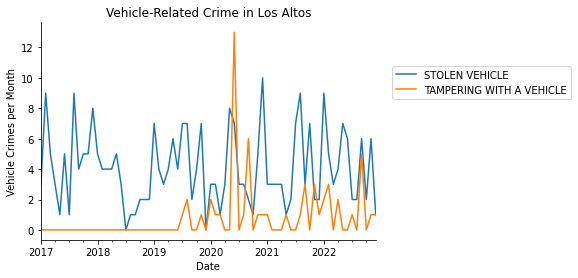

In [102]:
ax = vehicle_monthly_df.plot()   #rolling(window=3).mean().
ax.set(xlabel="Date", ylabel="Vehicle Crimes per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
plt.title("Vehicle-Related Crime in Los Altos")
sns.despine()
plt.savefig("Vehicle-Related Crime in Los Altos.png", bbox_inches="tight")

In [99]:
vehicle_monthly_df["TAMPERING WITH A VEHICLE"].sum()

55.0